# Distance Euclidienne

In [12]:
from cookie_clusters import *

In [13]:
import os
import cv2
from PIL import Image
import rasterio as rio
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import Kmeans, DBSCAN, OPTICS, HDBSCAN from sklearn.
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering

In [14]:
# List and dict of target pixels
pixels_de_interet, dic_de_pixels = create_dic_pixels()

In [15]:
dir = "../../ressources/images"
images_list = os.listdir(dir)

images_2A = list()
images_2B = list()
prog = re.compile(r'\w+2A')
for image in images_list:
    if prog.match(image):
        images_2A.append(image)
    else:
        images_2B.append(image)
        
images_2A.sort()
images_2B.sort()
all_images = images_2A + images_2B
all_images = sorted(all_images, key=lambda date: date[16:24])    

In [16]:
# Her you can chose the list of images you want to use.
list_to_use = all_images
line = 0
matrice_rouge = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_vert = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_bleu = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_nir = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_ndvi = np.zeros((len(pixels_de_interet), len(list_to_use)))
for image in list_to_use:
    with rio.open(dir+'/'+image, 'r') as ds:
        band1 = ds.read(1)
        band2 = ds.read(2)
        band3 = ds.read(3)
        band4 = ds.read(4)
        ndvi = (band1-band2)/(band1+band2) # Normalized Difference Vegetation Index
        ndvi = np.nan_to_num(ndvi)
    # Extraction of target pixels
    for pixel,j in zip(pixels_de_interet, range(len(pixels_de_interet))):
        matrice_vert[j,line] = band3[pixel[0], pixel[1]]
        matrice_rouge[j,line] = band2[pixel[0], pixel[1]]
        matrice_bleu[j,line] = band4[pixel[0], pixel[1]]
        matrice_nir[j,line] = band1[pixel[0], pixel[1]]
        matrice_ndvi[j,line] = ndvi[pixel[0], pixel[1]]
    line +=1

/tmp/ipykernel_34613/36240959.py:15: RuntimeWarning: invalid value encountered in divide
  ndvi = (band1-band2)/(band1+band2) # Normalized Difference Vegetation Index


(54, 141)


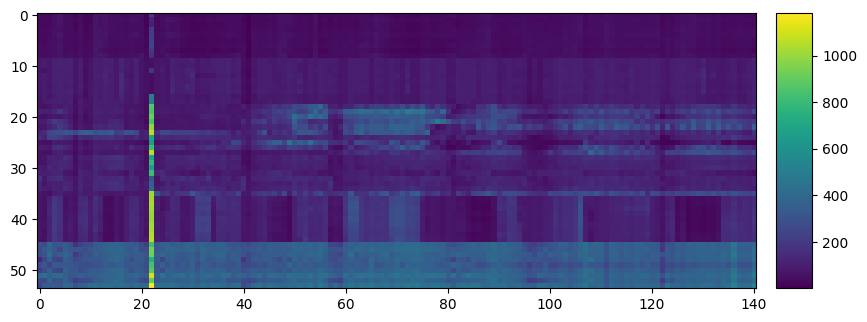

In [17]:
print(matrice_vert.shape)
#Looking for a pixels
img = (matrice_vert/8).astype(int)
#grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
ax = plt.gca()
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

## Bande vert

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


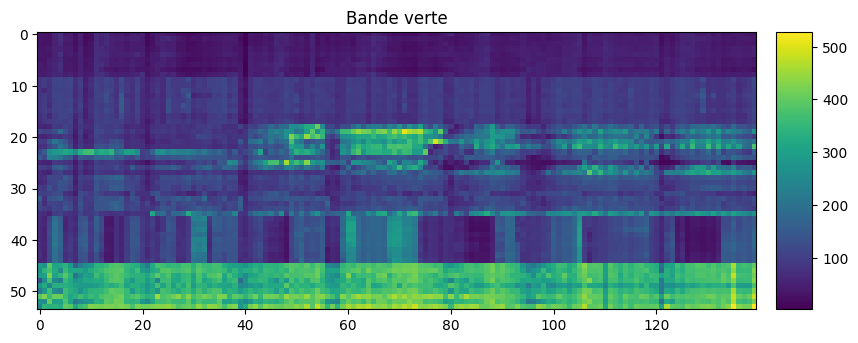

In [18]:
chelou = np.argmax(matrice_vert[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_vert,chelou,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande verte')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [26]:
km_vert = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_vert.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accuracy,f1_score
0,0.814815,0.755735


,calinski_harabasz_score
0,112.743417


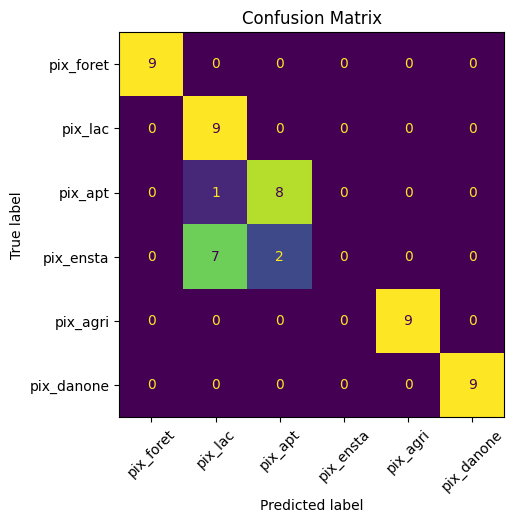

In [27]:
eval_bandevert = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_bandevert.confusion_matrix()
display(eval_bandevert.metrics_classif())
display(eval_bandevert.metrics_clustering())

## Bande bleu

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


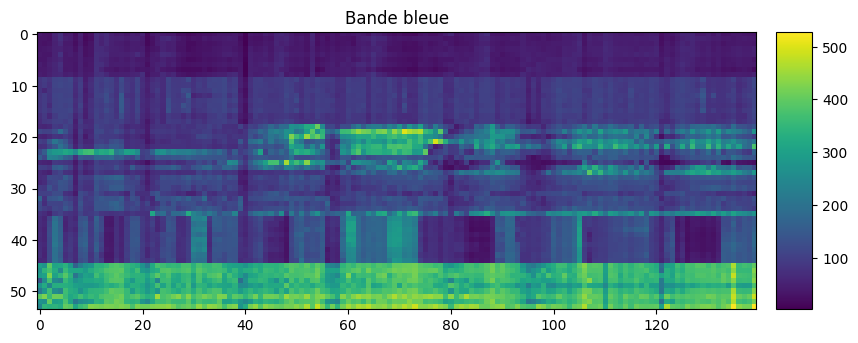

In [31]:
chelou = np.argmax(matrice_bleu[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_vert,chelou,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande bleue')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [29]:
km_bleu = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_bleu.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accuracy,f1_score
0,0.814815,0.755735


,calinski_harabasz_score
0,112.743417


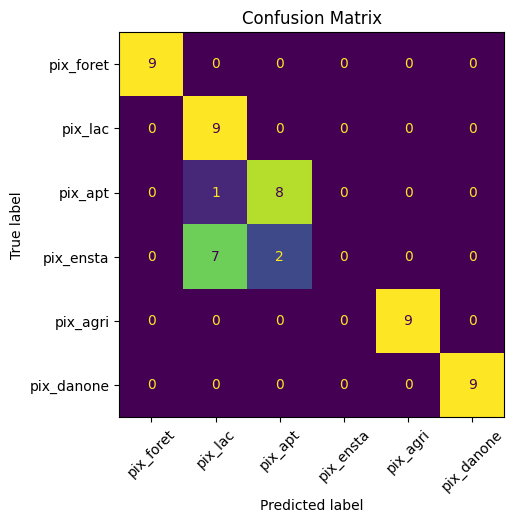

In [30]:
eval_bandebleu = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_bandebleu.confusion_matrix()
display(eval_bandebleu.metrics_classif())
display(eval_bandebleu.metrics_clustering())

## Bande rouge

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


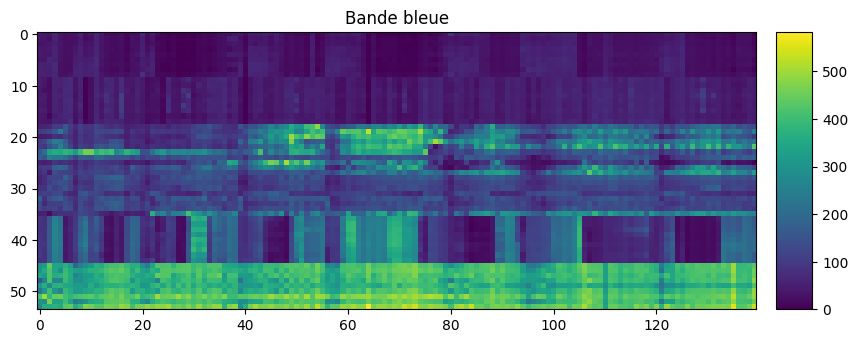

In [32]:
chelou = np.argmax(matrice_rouge[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_rouge,chelou,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande rouge')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [ ]:
km_rouge = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_rouge.predict(matrice)

,accuracy,f1_score
0,0.814815,0.755735


,calinski_harabasz_score
0,96.416938


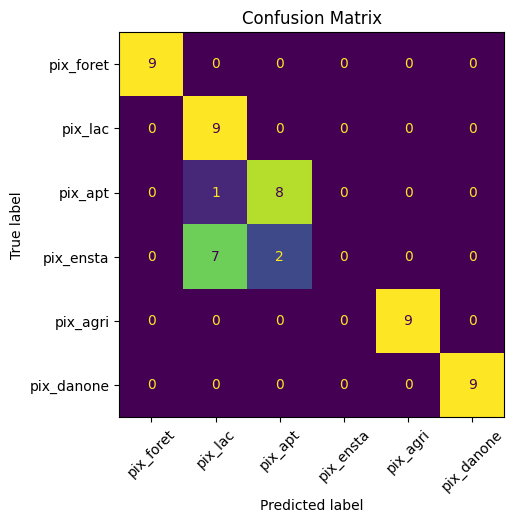

In [33]:
eval_banderouge = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_banderouge.confusion_matrix()
display(eval_banderouge.metrics_classif())
display(eval_banderouge.metrics_clustering())

## Bande NIR

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


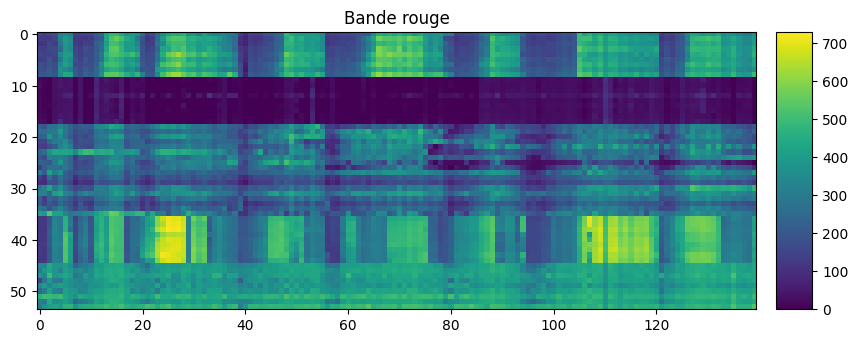

In [34]:
chelou = np.argmax(matrice_nir[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_nir,chelou,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande NIR')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [36]:
km_nri = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_nri.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accuracy,f1_score
0,0.851852,0.85


,calinski_harabasz_score
0,113.732166


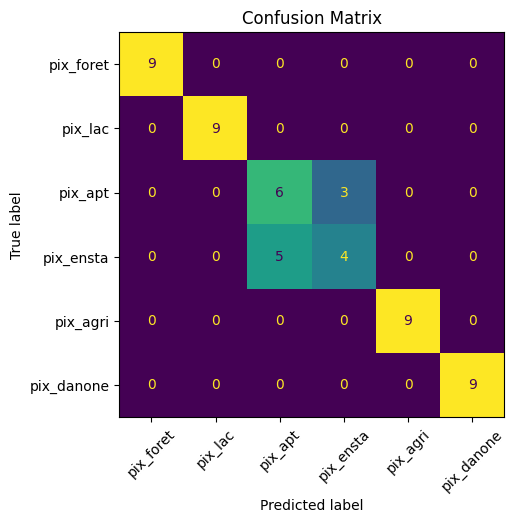

In [37]:
eval_nir = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_nir.confusion_matrix()
display(eval_nir.metrics_classif())
display(eval_nir.metrics_clustering())